# Rome wasn't built in a day: an analysis of eternal city's B&Bs #

Below we present an analysis of dataset made of more than 220k reviews (and associated data) of Rome's B&Bs, taken from TripAdvisor, using a scraping tool made with the [Chrome Headless Scraping Framework](https://github.com/nicodds/chesf) (CHeSF).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


reviews = pd.read_csv('reviews.csv', encoding='utf-8')
reviews['review_date'] = pd.to_datetime(reviews['review_date'])
reviews['review_year'] = reviews.review_date.dt.year
reviews['review_length'] = reviews.review_text.apply(len)

reviews.head(3)

,review_title,review_date,review_rating,review_text,review_language,review_user,review_id,property_id,review_year,review_length
0,Ottima posizione e personale gentilissimo,2017-11-27,5,"Ho soggiornato con la mia ragazza per 3 notti,...",it,topolindo,543750221,506221.0,2017,394
1,"Excellent, spotless clean, great location",2017-11-21,5,Warmly welcomed by Lorenzo and son Roberto. Ex...,en,L W,542485235,506221.0,2017,349
2,Excellent!,2017-11-17,5,Me and my friend have just got back from 3 nig...,en,Abi B,541574061,506221.0,2017,936


In [2]:
len(reviews)

223089

In [3]:
reviews.isna().sum()

review_title        3
review_date         0
review_rating       0
review_text         0
review_language     0
review_user         0
review_id           0
property_id        28
review_year         0
review_length       0
dtype: int64

In [4]:
properties = pd.read_csv('properties.csv', encoding='utf-8')
properties.head(3)

,property_id,property_name,property_reviews,property_rating,property_address,property_latitude,property_longitude
0,506221.0,Rome Downtown Accomodation,407,4.5,"Via Cavour 275 | 1st Floor With Lift, 00184 Ro...",41.893950,12.490302
1,2386058.0,B&B La Duchessa A Roma,480,5.0,"Via Duchessa di Galliera 14, Rome, Italy",41.869427,12.448288
2,2285303.0,Bed and Breakfast Tre Civette Sul Como,589,5.0,"Via Luigi Vittorio Bertarelli 7, 00159 Rome, I...",41.907978,12.534941


In [5]:
properties.isna().sum()

property_id           339
property_name           1
property_reviews      339
property_rating       339
property_address       37
property_latitude     339
property_longitude    339
dtype: int64

## Languages ##
Are reviews written in mainly in italian or english? Are there any other consistently used idiom?

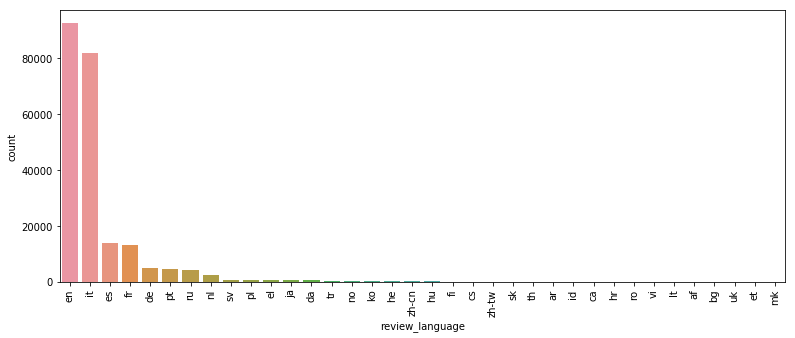

In [7]:
plt.subplots(figsize=(13,5))
sns.countplot('review_language',
              data=reviews,
              order=reviews.review_language.value_counts().index)
plt.xticks(rotation=90)
plt.show()

Users prefer to write reviews in english, then in italian language. This should be due mainly to the fact that Rome is an international destination frequented by thousands of travelers from different countries. Furthermore, Rome is also visited by many locals, i.e. italian travelers.

## Ratings ##
We obtained info both from the ratings associated to each review and from the average rating of each property. Let's start with the distribution of the user ratings

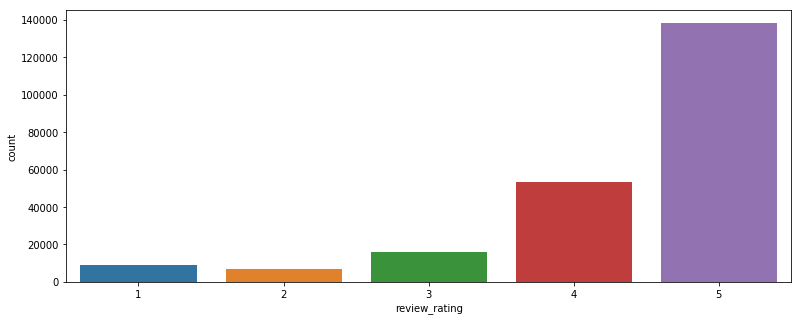

In [6]:
plt.subplots(figsize=(13,5))
sns.countplot('review_rating',
              data=reviews)
plt.show()

We see that users tend to write positive reviews. This could lead us to conclude that Rome's B&Bs are of very good quality. Personally, I think that on average this is true, but the distribution of ratings could be influenced by many things other than the quality of the stays. For example, an user that experienced an overall good travel in Rome, could be more prone to assign a positive review. Furthermore, the "easy" italian lifestyle fascinates travelers that stay in a location for a few days, while it could be disappointing for long periods. Last but not least, fake reviews could pollute the situation.

Let's see now the distribution of B&Bs average rating (as presented by TripAdvisor), comparing it with that computed from the properties reviews.

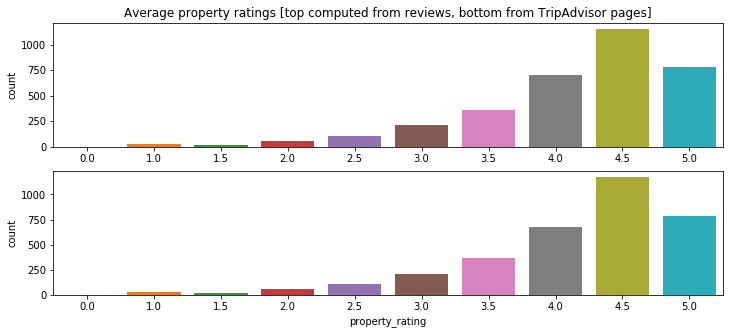

In [49]:
_,axs=plt.subplots(2,1,figsize=(12,5),sharex='row')

avg_rating = reviews.groupby('property_id')['review_rating'].mean().apply(lambda x: np.around(x * 2) / 2).sort_values()

sns.countplot(x=np.append(avg_rating.ravel(),0.0),ax=axs[0])
axs[0].set_title('Average property ratings [top computed from reviews, bottom from TripAdvisor pages]')
sns.countplot(x=properties.dropna().property_rating,ax=axs[1])

plt.show()

The two plots, except for really small differences, are the same. They confirm that users, on average, really appreciate the eternal city B&Bs.


## Reviews over time ##
How many reviews are written in an year? Is such number constant or does it changes?

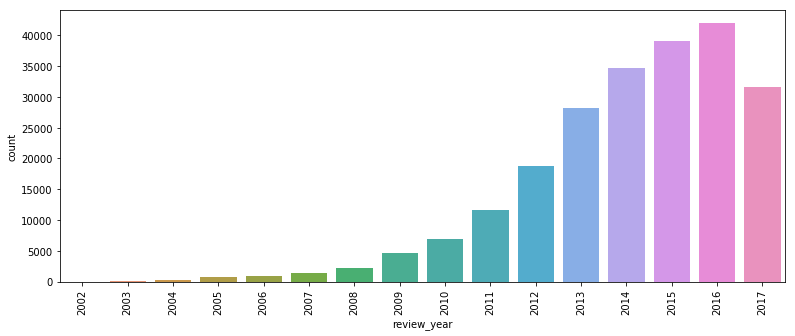

In [7]:
plt.subplots(figsize=(13,5))
sns.countplot('review_year',
              data=reviews)
plt.xticks(rotation=90)
plt.show()

## Spatial distribution of the structures ##
Are good B&Bs spread allover the city? Or, maybe, are they concentrated in some specific area? It's time to answer this question.

In [8]:
from mpl_toolkits.basemap import Basemap

rome_map = Basemap(projection='merc',
             llcrnrlat=41.7,urcrnrlat=42.1,
             llcrnrlon=12.22,urcrnrlon=12.68,
                  resolution='h', epsg=4326)

fully_qualified_properties = properties[properties.property_id.notna()]
colors = ['g', 'y', 'r']
properties_points = []
properties_points.append(fully_qualified_properties[fully_qualified_properties.property_rating >= 4])
properties_points.append(fully_qualified_properties[fully_qualified_properties.property_rating == 3])
properties_points.append(fully_qualified_properties[fully_qualified_properties.property_rating <= 2])

for i in [0,1,2]:
    xpt,ypt=rome_map(properties_points[i]['property_longitude'].ravel(),
                 properties_points[i]['property_latitude'].ravel())
    rome_map.scatter(xpt, ypt ,marker='.',color=colors[i],zorder=2)

#Fill the globe with a blue color 
rome_map.drawmapboundary(fill_color='aqua')
#Fill the continents with the land color
rome_map.fillcontinents(color='coral',lake_color='aqua')
rome_map.drawcoastlines()
rome_map.drawrivers(linewidth=1,color='aqua')

# point of interest
pois = {'Coliseum': [41.890251,12.492373], # Coliseum
       'Pantheon': [41.89904, 12.47678], # Pantheon
       'Vatican City': [41.90292, 12.45339], # Vatican City
       'Termini Station': [41.901542,12.500596], # Termini Station
       'Circo Massimo': [41.886238, 12.485277] # Circo Massimo
       }

for label, coords in pois.items():
    xpt,ypt = rome_map(coords[1], coords[0])
    rome_map.plot(xpt,ypt, marker='o', markersize=6, color='b')
    plt.annotate(label, xy=(xpt, ypt), xycoords='data',
                 textcoords='offset points', color='k',
                arrowprops=dict(arrowstyle="->"))

fig=plt.gcf()
fig.set_size_inches(15,10)

plt.show()

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

## Reviews length ##

We plot an interesting feature of the reviews corpus. The lengths distributions, both global and per ratings, are highly skewed. Furthermore, mean and standard deviation (respectively m and s in the plots) are approximately equal.

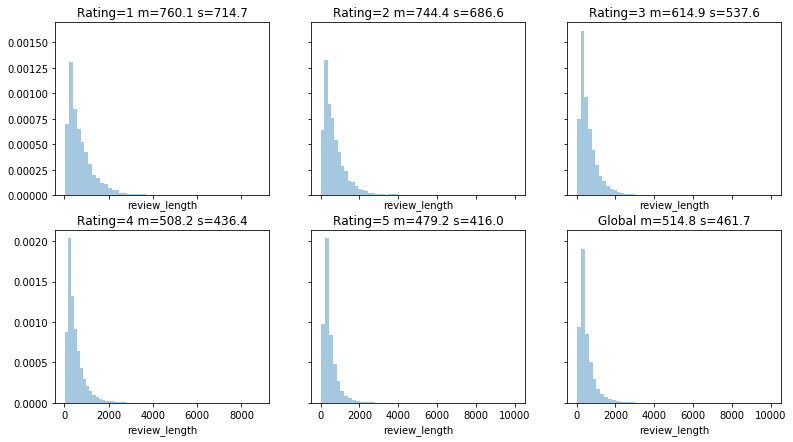

In [144]:
_, axs = plt.subplots(2, 3, sharex='col', sharey='row', figsize=(13,7))

for i in range(0,5):
    rating = reviews[reviews.review_rating == i+1].review_length
   
    if i<=2:
        (row, col) = (0, i)
    else:
        (row, col) = (1, i-3)

    sns.distplot(rating, kde=False, ax=axs[row,col], norm_hist=True)
    axs[row,col].set_title('Rating=%i m=%.1f s=%.1f'%(i+1, rating.mean(), rating.std()))

sns.distplot(reviews.review_length, kde=False, ax=axs[1,2], norm_hist=True)
axs[1,2].set_title('Global m=%.1f s=%.1f' %(reviews.review_length.mean(), reviews.review_length.std()))

plt.show()

## Per user reviews ##
How many unique users wrote the more than 222k reviews?

In [68]:
len(reviews.review_user.unique())

166973

This means that some users wrote more than a single review. Such behavior could be reasonable. I can visit a city more than a time, changing accomodation in each occasion. Consequently, I can write more than a single review. Let's dig further.

In [12]:
per_user = reviews.groupby('review_user').agg({'review_id': len})\
.rename(columns={'review_id': 'review_count'})\
.sort_values(by='review_count',ascending=False)

per_user.head(20)

,review_count
review_user,
A TripAdvisor Member,1360
A TripAdvisor China Member,194
Andrea C,90
Marco C,82
Andrea M,80
Marco M,79
Andrea B,77
Marco B,74
Giuseppe C,68


Except for the first two rows, we see that there are users that wrote more than 50 reviews! Moreover, they all share the same username pattern ("Name", a space character and a capital letter alone). Quite strange...

Let us remove the first two rows and further analyze the behavior of users

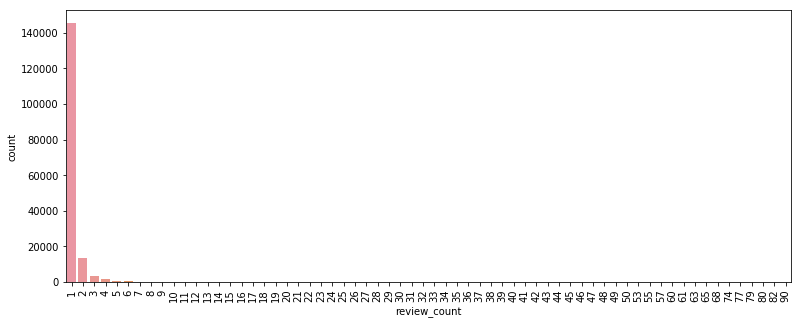

In [13]:
per_user.drop(per_user.index[:2], inplace=True)

plt.subplots(figsize=(13,5))
sns.countplot('review_count', data=per_user)
plt.xticks(rotation=90)
plt.show()

We see that a very large majority of users wrote a single review. Furthermore, the count drops so rapidly that with the scale used for the plot, we don't even notice any user writing more than 6 reviews. Let's try a sligthly different approach. Let's see how many users wrote more than 6 reviews

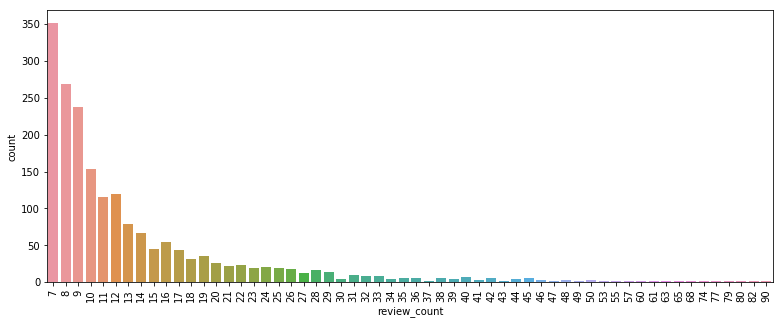

In [14]:
plt.subplots(figsize=(13,5))
sns.countplot('review_count', data=per_user[per_user.review_count >= 7])
plt.xticks(rotation=90)
plt.show()

It appears that writing more than 15 reviews per user could be considered an unlikely event. In order to be even more confident, let us consider as unlikely an user that writes 20 or more reviews

In [15]:
arbitrary_review_limit = 20
per_user[per_user.review_count >= arbitrary_review_limit].describe()

,review_count
count,299.000000
mean,30.648829
std,11.882270
min,20.000000
25%,23.000000
50%,27.000000
75%,34.000000
max,90.000000


In [16]:
per_user[per_user.review_count >= arbitrary_review_limit].sum()

review_count    9164
dtype: int64

About 300 users wrote more than 9k reviews and this is just a conservative estimation. This smells of fake!

Let's see if the username pattern seen above is just a coincidence.

In [17]:
pattern = '^[A-Z][a-z]+ [A-Z]$'
suspect = reviews[reviews.review_user.str.match(pattern)].groupby('review_user')\
.agg({'review_id': len, 'review_rating': np.mean})\
.rename(columns={'review_id': 'review_count', 'review_rating': 'average_rating'})\
.sort_values(by='review_count',ascending=False)

suspect.describe()

,review_count,average_rating
count,29654.000000,29654.000000
mean,2.307142,4.381126
std,3.852036,0.914153
min,1.000000,1.000000
25%,1.000000,4.000000
50%,1.000000,5.000000
75%,2.000000,5.000000
max,90.000000,5.000000


We found that about 30k users have the same name pattern and in average they wrote positive reviews. Surely, not all of them should be considered suspect. Nevertheless, at least the users that wrote more than 20 reviews could be considered as fake users.

In [18]:
suspect[suspect.review_count >= arbitrary_review_limit].review_count.sum()

9116

It a kind of magic! It's quite the same number we obtained before. We can say that 99.5% of the user that wrote 20 or more reviews share the same name pattern.

As we said above, all such users tend to write (on average) positive reviews, as illustrade by the following plot

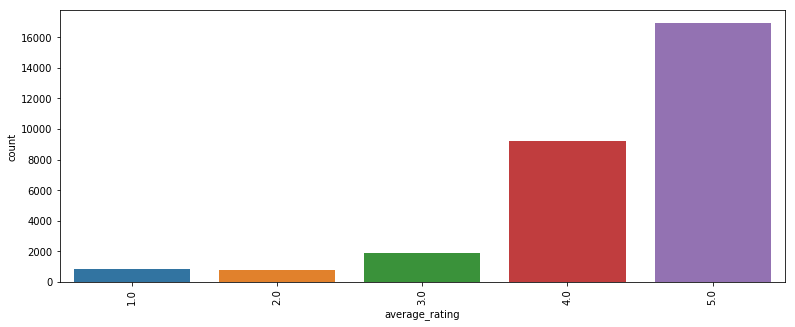

In [19]:
suspect.average_rating = suspect.average_rating.apply(np.around)
plt.subplots(figsize=(13,5))
sns.countplot('average_rating',
              data=suspect)
plt.xticks(rotation=90)
plt.show()

## Conclusions ##
I presented a dataset consisting of a corpus of more than 222k reviews of Rome's B&Bs. On average, it appears that the structures are appreciated by travelers. In spite of this, we found also that several users are very prolific writers, writing also 90 different reviews. Such users share all the same name pattern (i.e. Name-space-a_capital_letter) and wrote many positive reviews. We found that almost all users that wrote more than 20 reviews fall in this category.

It appears that someone in Rome is offering a service of fake reviews to let some structure artificially jumps on TripAdvisor Ranking. The twitter account of TripAdvisor has been informed.